In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pickle
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import math
import json as j
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from textblob import TextBlob
from sklearn.model_selection import KFold
%matplotlib inline


In [2]:
# Upload the data
airbnb = pd.read_csv('Airbnb.csv')

# Clean the data
cols_to_drop = ['id', 'host_id', 'host_since','host_is_superhost', 'host_identity_verified', 'last_review']
airbnb = airbnb.drop(cols_to_drop, axis=1)

### Data Cleaning and Reshaping

In [3]:
#airbnb.dtypes

#see if there are missing values in the dataset
airbnb.isnull().sum()

name                                 18
host_name                            29
instant_bookable                      0
accommodates                          0
amenities                             0
State                                 0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
bathrooms                           184
bedrooms                          16635
beds                               1284
price                                 0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
reviews_per_month                 36555
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#Let's replace missing values for reviews per month, bathrooms, bedrooms, beds by zero.

airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.fillna({'bathrooms':0}, inplace=True)
airbnb.fillna({'bedrooms':0}, inplace=True)
airbnb.fillna({'beds':0}, inplace=True)

# drop all empty dataset
airbnb.isna().sum().sum()
airbnb.dropna(inplace=True)

#airbnb.isnull().sum()

In [5]:
#summary stats
airbnb[['price','bathrooms','bedrooms','beds', 'price','number_of_reviews']].describe()

#data = airbnb[['price','bathrooms','bedrooms','beds', 'price','number_of_reviews']].describe()
#print(data.to_latex(index=True))

,price,bathrooms,bedrooms,beds,price,number_of_reviews
count,158202.000000,158202.000000,158202.000000,158202.000000,158202.000000,158202.000000
mean,204.351159,1.435955,1.466132,2.072142,204.351159,112.381550
std,500.216416,0.878996,1.122834,1.792777,500.216416,278.120134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1.000000,1.000000,1.000000,75.000000,1.000000
50%,120.000000,1.000000,1.000000,2.000000,120.000000,12.000000
75%,200.000000,2.000000,2.000000,3.000000,200.000000,62.000000
max,25000.000000,50.000000,50.000000,66.000000,25000.000000,1825.000000


In [6]:
#max price is suspiciously high (or maybe the unit is too luxirious). 
#therefore to avoid any error, we will drop outliers price>1000
airbnb1=airbnb[airbnb['price']<1000]
airbnb=airbnb1[airbnb1['price']>0]

In [7]:
# check summery stats again
airbnb[['price','bathrooms','bedrooms','beds', 'price','number_of_reviews']].describe()

#df= airbnb[['price','bathrooms','bedrooms','beds', 'price','number_of_reviews']].describe()
#print(df.to_latex(index=True))

,price,bathrooms,bedrooms,beds,price,number_of_reviews
count,155251.000000,155251.000000,155251.000000,155251.000000,155251.000000,155251.000000
mean,162.707280,1.392323,1.421144,2.016927,162.707280,110.696942
std,142.659746,0.754401,1.022785,1.643945,142.659746,274.767935
min,10.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,75.000000,1.000000,1.000000,1.000000,75.000000,1.000000
50%,120.000000,1.000000,1.000000,2.000000,120.000000,12.000000
75%,199.000000,2.000000,2.000000,3.000000,199.000000,62.000000
max,999.000000,50.000000,27.000000,51.000000,999.000000,1825.000000


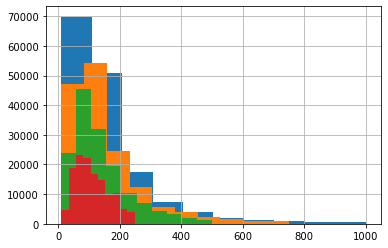

In [8]:
hist_price1=airbnb["price"].hist()
hist_price2=airbnb["price"][airbnb["price"]<750].hist()
hist_price3=airbnb["price"][airbnb["price"]<500].hist()
hist_price4=airbnb["price"][airbnb["price"]<250].hist()

In [9]:
#Lets see average prices

print('------------Overal---------------')
price_avg = airbnb.price.mean()
print('Average price per night: $ {}'.format(price_avg))

print('-------By Neighbourhood Group--------')
ng_price=airbnb.groupby("neighbourhood_group")["price"].mean()
print('Average price by neighbourhood group: $ {}'.format(ng_price))

print('----------By State-----------')
st_price=airbnb.groupby("State")["price"].mean()
print('Average price by state: $ {}'.format(st_price))

print('--------By Room Type---------')
rt_price=airbnb.groupby("room_type")["price"].mean()
print('Average price by room type: $ {}'.format(rt_price))

------------Overal---------------
Average price per night: $ 162.7072804684028
-------By Neighbourhood Group--------
Average price by neighbourhood group: $ neighbourhood_group
 Santa Cruz           263.515901
Bronx                  89.068596
Brooklyn              113.512176
Broward County        165.376614
Chicago               127.605563
Clark County          172.274671
Hawaii                198.735407
Honolulu              186.437975
Kauai                 276.349636
Los Angeles           151.988975
Manhattan             158.108339
Maui                  276.641713
Nashville             188.472659
Queens                 92.964208
Saint Clara County    132.590651
San Diego County      192.559355
San Francisco         172.051444
San Mateo             162.597946
Seattle               130.556816
Staten Island         106.890909
Washington D.C        145.384160
Name: price, dtype: float64
----------By State-----------
Average price by state: $ State
California    161.917529
DC            1

C:\Users\konda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

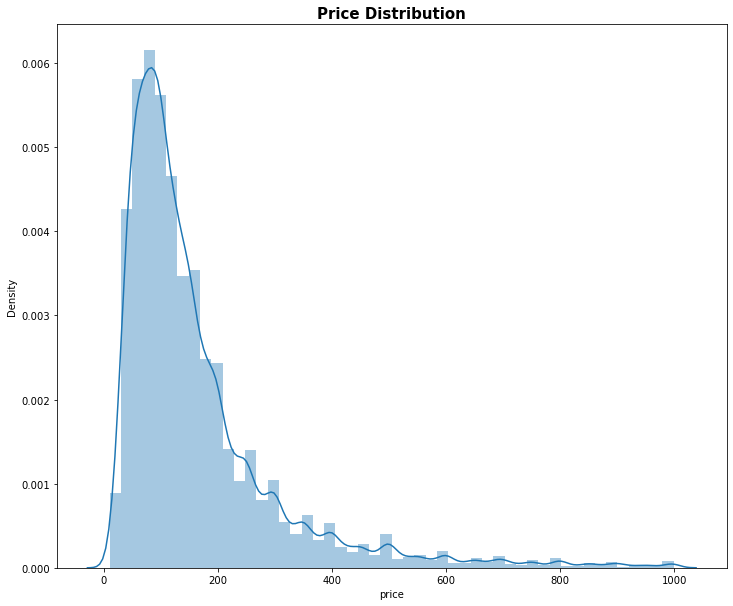

In [10]:
plt.figure(figsize=(12,10))
sns.distplot(airbnb['price'])
plt.title(size=15, weight='bold', label='Price Distribution')

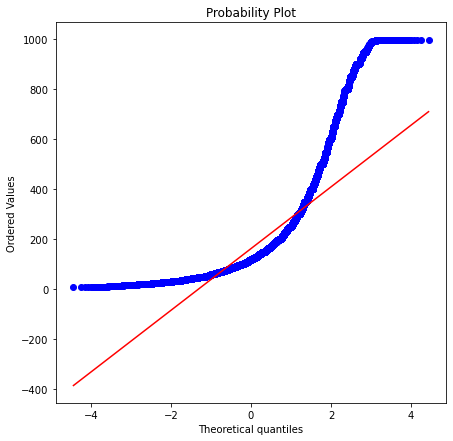

In [11]:
#Goodness of fit
plt.figure(figsize=(7,7))
stats.probplot(airbnb['price'], plot=plt)
plt.show()

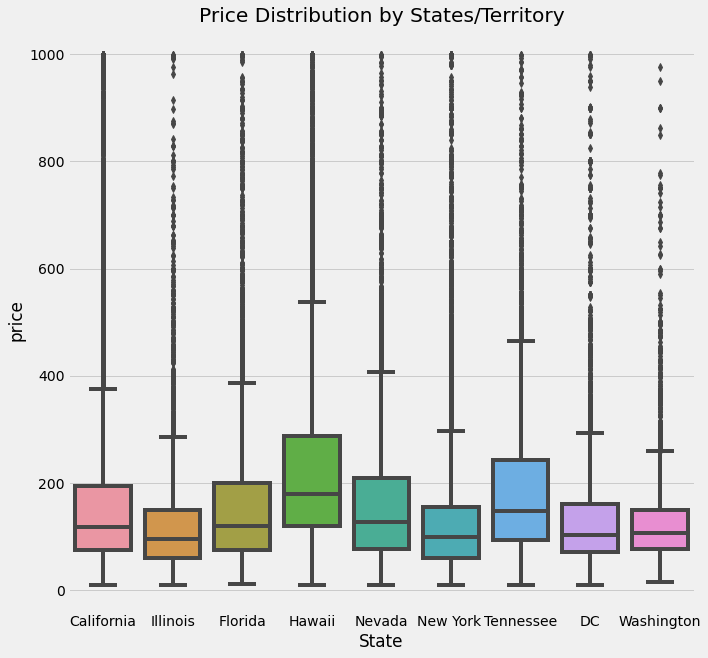

In [12]:
# we will now check price distribution by states

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
sns.boxplot(y='price',x='State',data = airbnb)
plt.title('Price Distribution by States/Territory')
plt.show()

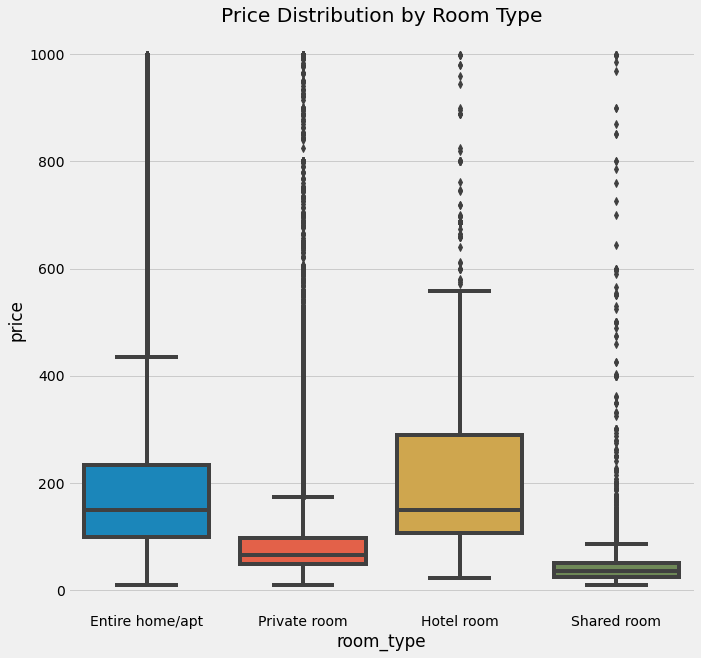

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
sns.boxplot(y='price',x='room_type',data = airbnb)
plt.title('Price Distribution by Room Type')
plt.show()

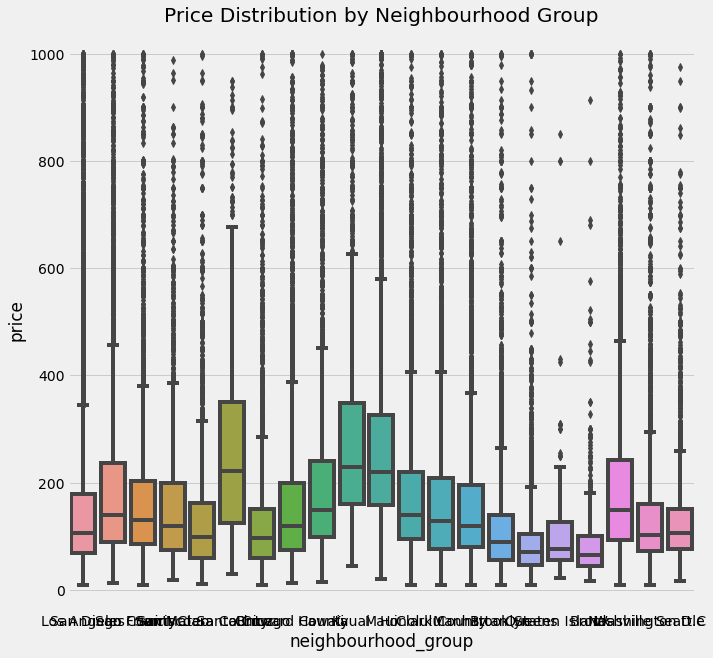

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

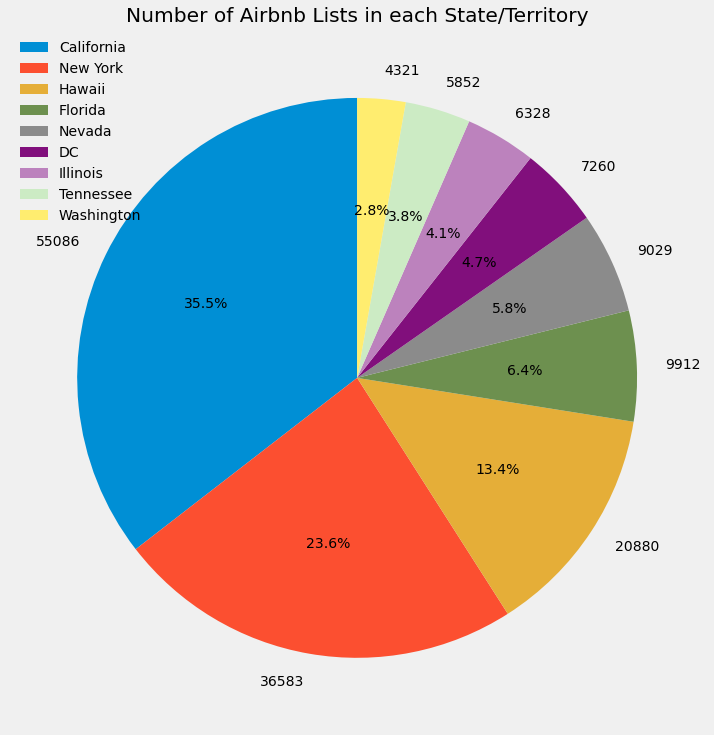

In [15]:
#see the number of states in the dataset

labels = airbnb.State.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b', '#810f7c', '#bc82bd', '#ccebc4', '#ffed6f']
shape = airbnb.State.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels, loc='upper left', frameon=False)
plt.title('Number of Airbnb Lists in each State/Territory')
plt.show()

### NL Process (text data cleaning) and Sentiment Analysis

In [16]:
# clean the text from all the unnecessary characters

import re
def  clean_text(df, new_text_field1, new_text_field2):
    airbnb[new_text_field1] = airbnb['name'].str.lower()
    airbnb[new_text_field1] = airbnb[new_text_field1].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\w*\d\w*|[‘’“”…]|\n|", "", elem))  
    
    airbnb[new_text_field2] = airbnb['amenities'].str.lower()
    airbnb[new_text_field2] = airbnb[new_text_field2].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\w*\d\w*|[‘’“”…]|\n|", "", elem))  
    
    return df
data_clean = clean_text(airbnb, 'name_clean', 'amenities_clean')


<ipython-input-16-5c4cd1fedfd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb[new_text_field1] = airbnb['name'].str.lower()
<ipython-input-16-5c4cd1fedfd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb[new_text_field1] = airbnb[new_text_field1].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\w*\d\w*|[‘’“”…]|\n|", "", elem))
<ipython-input-16-5c4cd1fedfd5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [17]:
#rename the dataframe and drop raw text data
cols_to_drop = ['name','amenities']
data_clean = data_clean.drop(cols_to_drop, axis=1)
airbnb = data_clean

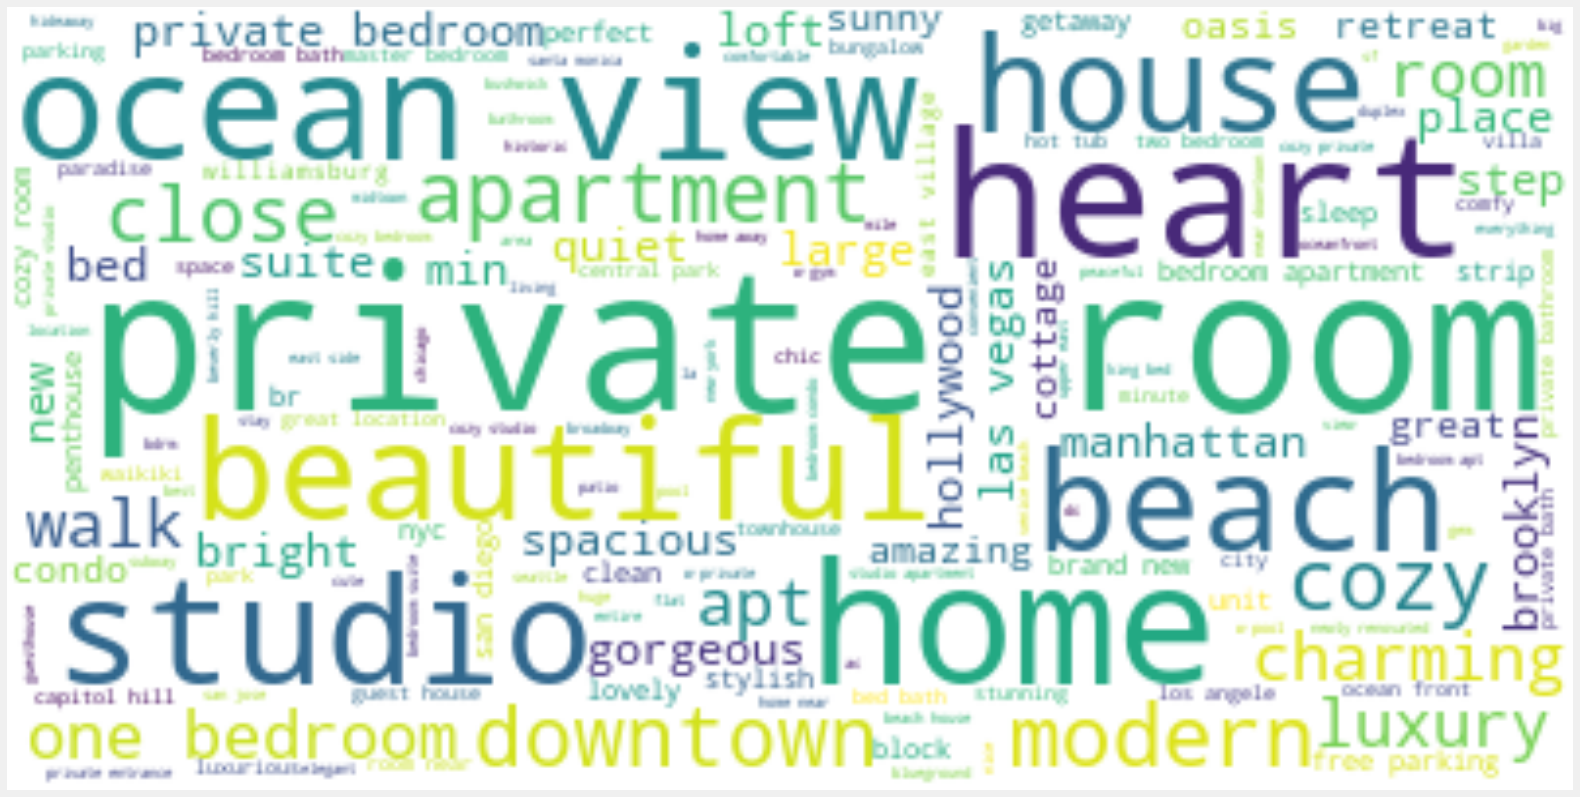

In [18]:
# here we can see the most used words in the listing name 

from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join(str(n).lower() for n in airbnb.name_clean)

#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))

#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

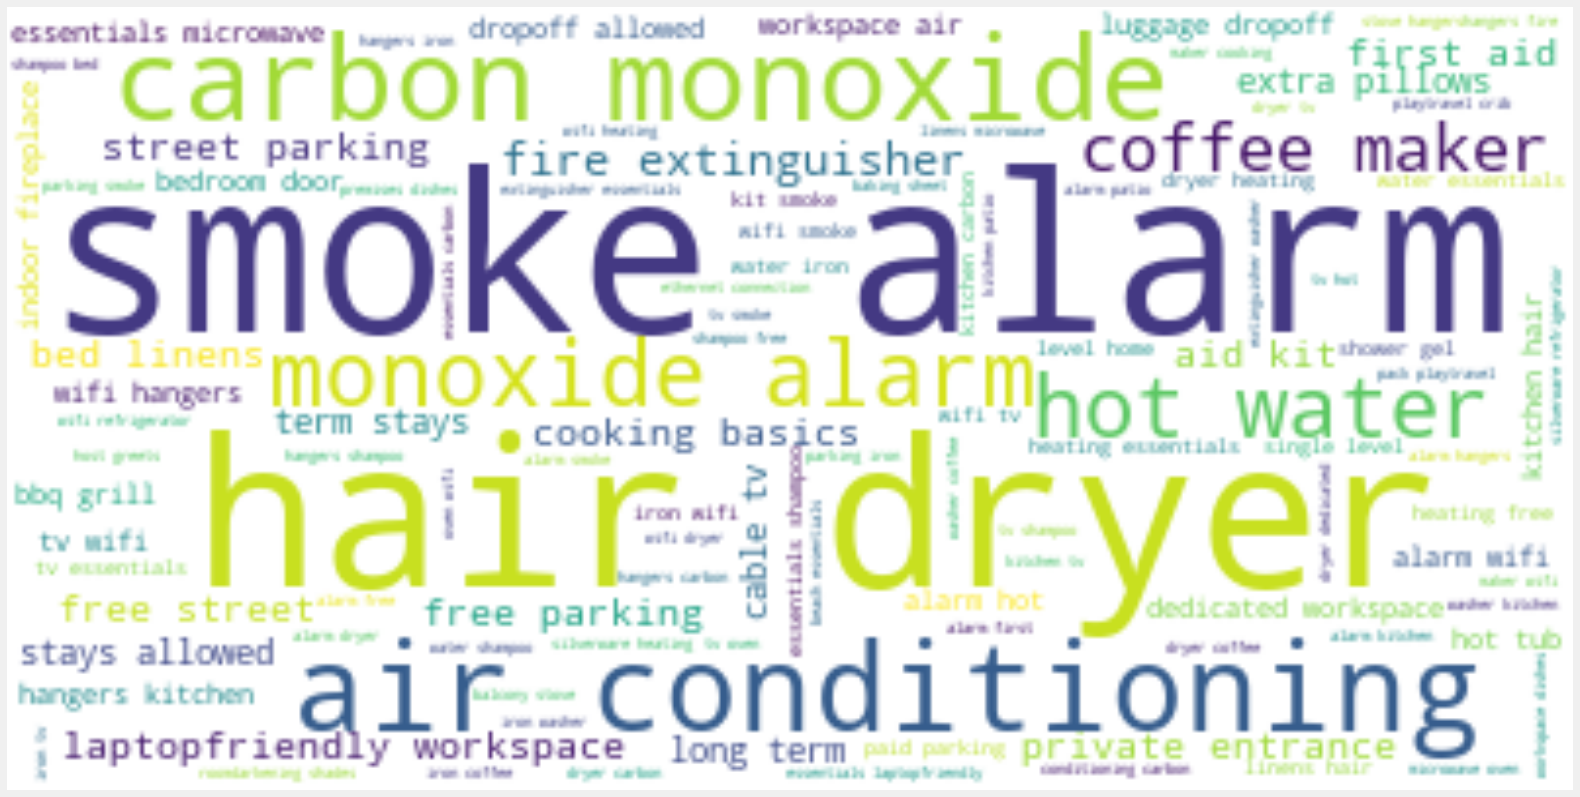

In [19]:
# here we can see the most used words in amenities listed 

text = ' '.join(str(n).lower() for n in airbnb.amenities_clean)

#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))

#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
# Sentimental analysis

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Listing Name
airbnb['polarity1'] = airbnb['name_clean'].apply(pol)
airbnb['subjectivity1'] = airbnb['name_clean'].apply(sub)

# Amenities Listed
airbnb['polarity2'] = airbnb['amenities_clean'].apply(pol)
airbnb['subjectivity2'] = airbnb['amenities_clean'].apply(sub)

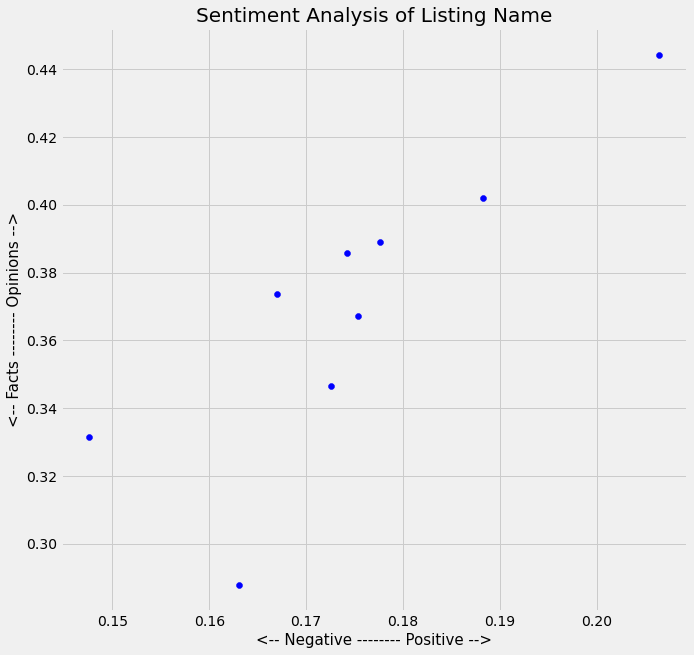

In [21]:
airbnb1 = airbnb.groupby('State').mean()

#plot sentiment analysis for a Listing Name

plt.rcParams['figure.figsize'] = [10, 10]

for index, State in enumerate(airbnb1.index):
    x = airbnb1.polarity1.loc[State]
    y = airbnb1.subjectivity1.loc[State]
    plt.scatter(x, y, color='blue')
   
    
plt.title('Sentiment Analysis of Listing Name', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

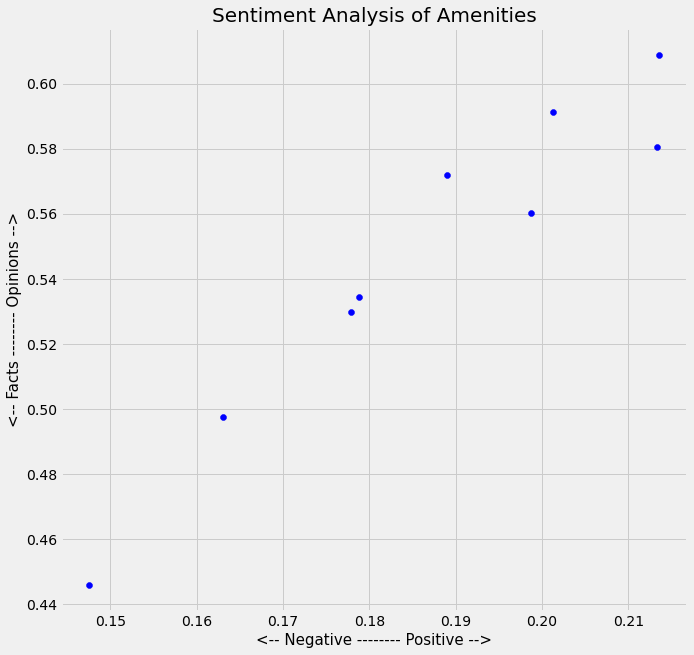

In [22]:
#plot sentiment analysis for amenities listed

plt.rcParams['figure.figsize'] = [10, 10]

for index, State in enumerate(airbnb1.index):
    x = airbnb1.polarity2.loc[State]
    y = airbnb1.subjectivity2.loc[State]
    plt.scatter(x, y, color='blue')
   
    
plt.title('Sentiment Analysis of Amenities', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### ML Analysis

In [23]:
# converting each value of column to a string
airbnb['name_clean'] = pd.to_numeric(airbnb['name_clean'], errors = 'coerce')
airbnb['amenities_clean'] = pd.to_numeric(airbnb['amenities_clean'], errors = 'coerce')

In [24]:
#remove all the categorical varaibles

airbnb = airbnb.drop(['name_clean','amenities_clean','host_name','instant_bookable','neighbourhood', 'property_type', 
                     'calculated_host_listings_count','minimum_nights','maximum_nights',
                     'latitude','longitude'], axis=1)

# first create state dummies
airbnb = pd.get_dummies(airbnb, columns=['State', 'neighbourhood_group', 'room_type'])


In [25]:
# Start regression analysis

#independent variable
xmat = airbnb.drop(['price'],axis=1)

#dependent variable
y = airbnb['price']

#train the data
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)

##### Linear Regression

In [28]:
#Linear Regression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

#predicition and coeefitients
y_pred= reg.predict(X_test)

#LR Coefficients
Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]=X_train.columns
Coeff["Coefficient"]=reg.coef_
Coeff.sort_values("Coefficient")

### Calculate RMSE
rmseLN = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmseLN

104.51547083339258

In [29]:
### Taking a closer look at the estimates
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     2615.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        17:07:22   Log-Likelihood:            -6.6149e+05
No. Observations:              108675   AIC:                         1.323e+06
Df Residuals:                  108640   BIC:                         1.323e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

C:\Users\konda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


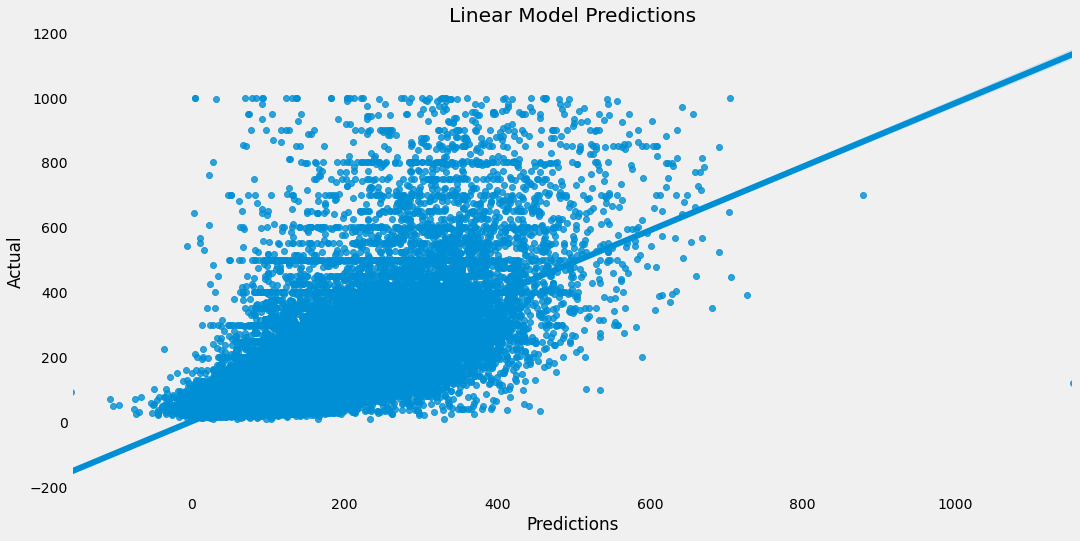

In [30]:
# let's check the accuracy of prediction on a graph

plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

##### Ridge Regression

In [53]:
#Ridge Resression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
r_pred = ridge.predict(X_train) 
print(test_score)
print(train_score)

0.4463360233222603
0.450100734235544


In [51]:
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -66.121
Config: {'alpha': 0.99}


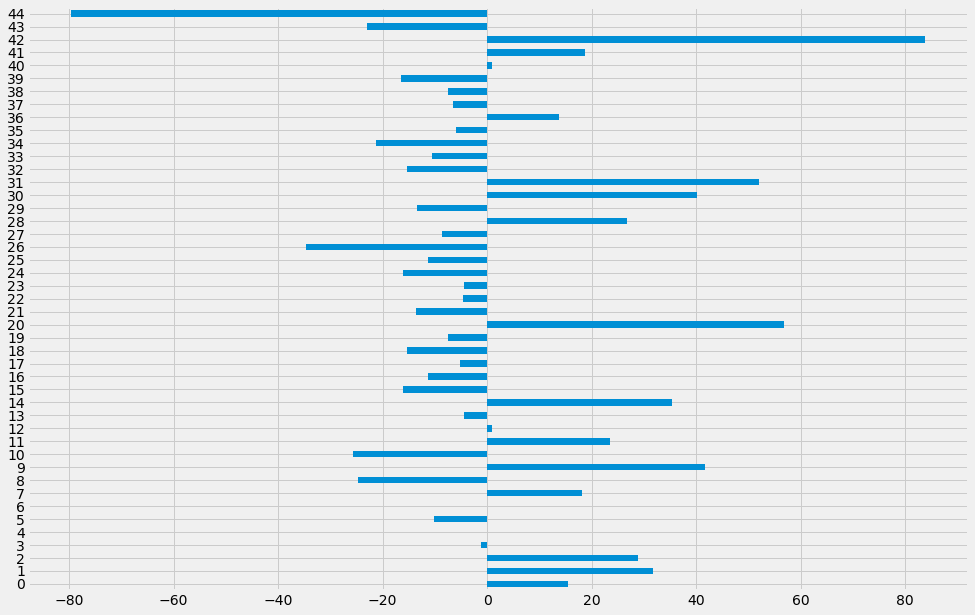

0     15.454289
1     31.676215
2     28.896005
3     -1.229826
4      0.003814
5    -10.175846
6      0.008843
7     18.260766
8    -24.624271
9     41.792859
10   -25.645715
11    23.538810
12     1.002968
13    -4.482529
14    35.310983
15   -16.074678
16   -11.368115
17    -5.121658
18   -15.390964
19    -7.414817
20    56.864253
21   -13.686714
22    -4.690492
23    -4.482529
24   -16.074678
25   -11.368115
26   -34.659790
27    -8.705945
28    26.713661
29   -13.399034
30    40.113473
31    51.963058
32   -15.390964
33   -10.458866
34   -21.201575
35    -5.969859
36    13.699183
37    -6.454157
38    -7.414817
39   -16.399058
40     1.002968
41    18.701678
42    83.880003
43   -22.979008
44   -79.602673
dtype: float64


In [33]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(ridge.coef_)
important_coeff.plot(kind="barh")
plt.show()
print(important_coeff)

##### Lasso Regression

In [54]:
#LASSO regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
ls_pred = lasso.predict(X_train) 
print(test_score)
print(train_score)

0.4266046931475438
0.43102924767330864


In [35]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -66.022
Config: {'alpha': 0.15}


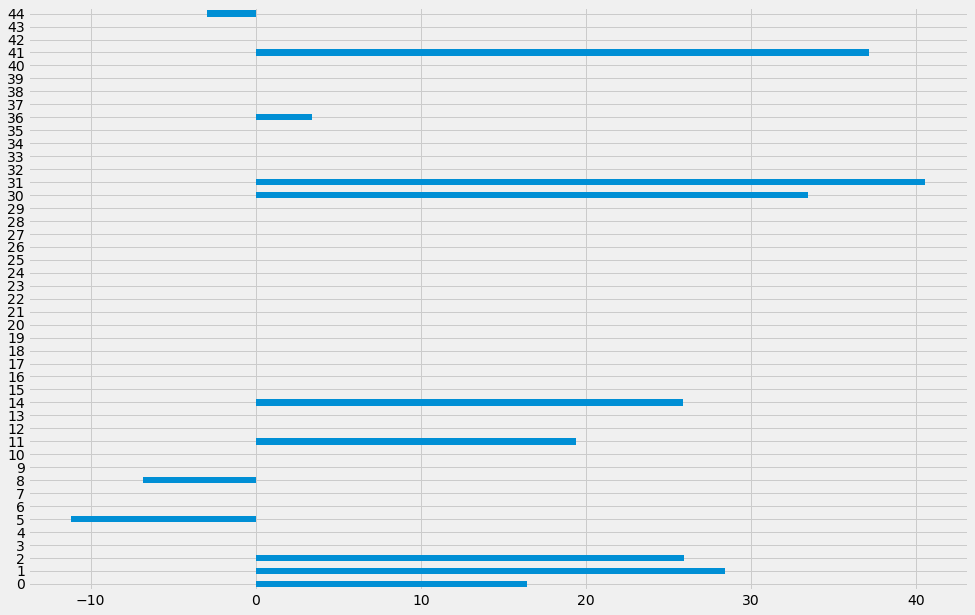

0     16.461196
1     28.435704
2     25.960835
3     -0.000000
4      0.019027
5    -11.183682
6      0.004018
7      0.000000
8     -6.852208
9     -0.000000
10    -0.000000
11    19.425455
12     0.000000
13    -0.000000
14    25.875158
15    -0.000000
16    -0.000000
17     0.000000
18    -0.000000
19    -0.000000
20     0.000000
21    -0.000000
22    -0.000000
23    -0.000000
24    -0.000000
25    -0.000000
26    -0.000000
27    -0.000000
28     0.000000
29    -0.000000
30    33.453758
31    40.563008
32    -0.000000
33    -0.000000
34    -0.000000
35     0.000000
36     3.396239
37     0.000000
38    -0.000000
39    -0.000000
40     0.000000
41    37.175152
42     0.000000
43    -0.000000
44    -2.925509
dtype: float64


In [36]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(lasso.coef_)
important_coeff.plot(kind="barh")
plt.show()
print(important_coeff)

##### Elastic Net

In [55]:
#ElasticNet
enet = ElasticNet(alpha=1.0)
enet.fit(X_train,y_train)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
coeff_used = np.sum(enet.coef_!=0)
enethat = enet.predict(X_train)
print(test_score)
print(train_score)

0.39395832867161773
0.3986802616208739


In [38]:
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -66.046
Config: {'alpha': 0.01}


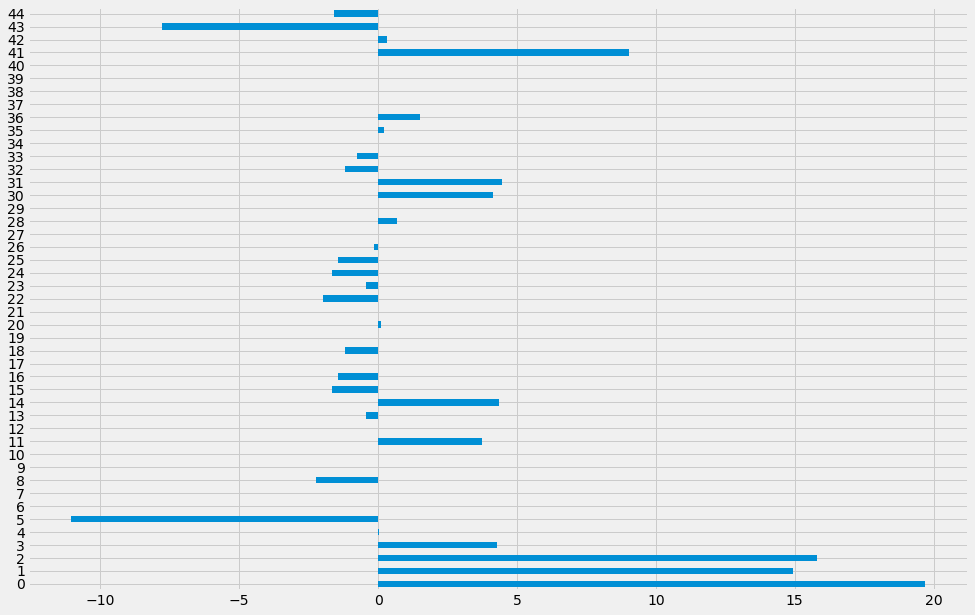

0     19.701425
1     14.950494
2     15.803293
3      4.292071
4      0.041143
5    -11.050279
6      0.009154
7      0.000000
8     -2.219095
9     -0.000000
10    -0.000000
11     3.742830
12    -0.000000
13    -0.434132
14     4.335463
15    -1.675476
16    -1.430539
17    -0.000000
18    -1.186479
19    -0.004795
20     0.099161
21    -0.000000
22    -1.982057
23    -0.434131
24    -1.675476
25    -1.430536
26    -0.142772
27    -0.000000
28     0.667680
29     0.000000
30     4.144541
31     4.454156
32    -1.186478
33    -0.748588
34    -0.000000
35     0.207401
36     1.516474
37     0.000000
38    -0.004795
39    -0.000000
40    -0.000000
41     9.022926
42     0.317337
43    -7.764605
44    -1.575696
dtype: float64


In [39]:
plt.figure(figsize=(15,10))
important_coeff1=pd.Series(enet.coef_)
important_coeff1.plot(kind="barh")
plt.show()
print(important_coeff1)

##### Train Split

In [58]:
print('---------------Linear ---------------------')

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred= reg.predict(X_train)
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Ridge ---------------------')

ridge_model = Ridge(alpha = 0.99)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Lasso ---------------------')

Lasso_model = Lasso(alpha = 0.15)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Elastic Net ---------------------')

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_enet= model_enet.predict(X_train)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
print(test_score)
print(train_score)

---------------Linear ---------------------
0.4463365998699118
0.45010074625378427
---------------Ridge ---------------------
0.4463360233222603
0.450100734235544
---------------Lasso ---------------------
0.4266046931475438
0.43102924767330864
---------------Elastic Net ---------------------
0.39395832867161773
0.3986802616208739


In [59]:
#Mean Absolute Error (MAE) shows the difference between predictions and actual values.
#Root Mean Square Error (RMSE) shows how accurately the model predicts the response.
#R^2 will be calculated to find the goodness of fit measure.


print('---------------Linear ---------------------')

print('MAE: %f'% mean_absolute_error(y_train, y_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_train, y_pred)))   
print('R2 %f' % r2_score(y_train, y_pred))



print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_train, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_train, pred_ridge)))   
print('R2 %f' % r2_score(y_train, pred_ridge))



print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_train, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_train, pred_Lasso)))
print('R2 %f' % r2_score(y_train, pred_Lasso))



print('---------------ElasticNet-------------------')

print('MAE: %f' % mean_absolute_error(y_train,pred_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_train, pred_enet))) #RMSE
print('R2 %f' % r2_score(y_train, pred_enet))



---------------Linear ---------------------
MAE: 66.444403
RMSE: 106.477904
R2 0.450101
---------------Ridge ---------------------
MAE: 66.443842
RMSE: 106.477905
R2 0.450101
---------------Lasso-----------------------
MAE: 66.344837
RMSE: 106.588983
R2 0.448953
---------------ElasticNet-------------------
MAE: 66.375371
RMSE: 106.607721
R2 0.448759


In [62]:
print('---------------Linear ---------------------')

def MAPE(y_train,y_pred):
    mape = np.mean(np.abs((y_train - y_pred)/y_train))*100
    return mape

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
reg.fit(X_train,y_train)
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
y_pred = reg.predict(X_train) 
lm_MAPE = MAPE(y_train,y_pred)
print("MAPE value: ",lm_MAPE)
AccuracyLM = 100 - lm_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyLM))



print('---------------Ridge ---------------------')

def MAPE(y_train,pred_ridge):
    mape = np.mean(np.abs((y_train - pred_ridge)/y_train))*100
    return mape

ridge = Ridge(alpha=0.99)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
pred_ridge = ridge.predict(X_train) 
ridge_MAPE = MAPE(y_train,pred_ridge)
print("MAPE value: ",ridge_MAPE)
AccuracyRR = 100 - ridge_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyRR))


print('---------------Lasso ---------------------')

def MAPE(y_train,pred_Lasso):
    mape = np.mean(np.abs((y_train - pred_Lasso)/y_train))*100
    return mape

lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_train)
Lasso_MAPE = MAPE(y_train,lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracyls = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyls))


print('---------------Elastic Net ---------------------')

def MAPE(y_train,pred_enet):
    mape = np.mean(np.abs((y_train - pred_enet)/y_train))*100
    return mape

enet = ElasticNet(alpha=1.0)
enet = enet.fit(X_train , y_train)
enet_predict = enet.predict(X_train)
enet_MAPE = MAPE(y_train,enet_predict)
print("MAPE value: ",enet_MAPE)
Accuracyenet = 100 - enet_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyenet))



---------------Linear ---------------------
MAPE value:  51.60869767715558
Accuracy of Lasso Regression: 48.39%.
---------------Ridge ---------------------
MAPE value:  51.60828304258401
Accuracy of Lasso Regression: 48.39%.
---------------Lasso ---------------------
MAPE value:  54.2132256051154
Accuracy of Lasso Regression: 45.79%.
---------------Elastic Net ---------------------
MAPE value:  58.94553806470848
Accuracy of Lasso Regression: 41.05%.


##### Test Split

In [67]:
print('---------------Linear ---------------------')

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred= reg.predict(X_test)
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Ridge ---------------------')

ridge_model = Ridge(alpha = 0.99)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Lasso ---------------------')

Lasso_model = Lasso(alpha = 0.15)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Elastic Net ---------------------')

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_enet= model_enet.predict(X_test)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
print(test_score)
print(train_score)

---------------Linear ---------------------
0.4463365998699118
0.45010074625378427
---------------Ridge ---------------------
0.44633602920330295
0.450100734474298
---------------Lasso ---------------------
0.4266046931475438
0.43102924767330864
---------------Elastic Net ---------------------
0.39395832867161773
0.3986802616208739


In [69]:
#Mean Absolute Error (MAE) shows the difference between predictions and actual values.
#Root Mean Square Error (RMSE) shows how accurately the model predicts the response.
#R^2 will be calculated to find the goodness of fit measure.


print('---------------Linear ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, y_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))   
print('R2 %f' % r2_score(y_test, y_pred))



print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))



print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))



print('---------------ElasticNet-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_enet))



---------------Linear ---------------------
MAE: 65.767649
RMSE: 104.515471
R2 0.446337
---------------Ridge ---------------------
MAE: 65.767077
RMSE: 104.515525
R2 0.446336
---------------Lasso-----------------------
MAE: 65.648707
RMSE: 104.624202
R2 0.445184
---------------ElasticNet-------------------
MAE: 65.690547
RMSE: 104.661468
R2 0.444789


In [70]:
print('---------------Linear ---------------------')

def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
reg.fit(X_train,y_train)
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
y_pred = reg.predict(X_test) 
lm_MAPE = MAPE(y_test,y_pred)
print("MAPE value: ",lm_MAPE)
AccuracyLM = 100 - lm_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyLM))



print('---------------Ridge ---------------------')

def MAPE(y_test,pred_ridge):
    mape = np.mean(np.abs((y_test - pred_ridge)/y_test))*100
    return mape

ridge = Ridge(alpha=0.99)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
pred_ridge = ridge.predict(X_test) 
ridge_MAPE = MAPE(y_test,pred_ridge)
print("MAPE value: ",ridge_MAPE)
AccuracyRR = 100 - ridge_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyRR))


print('---------------Lasso ---------------------')

def MAPE(y_test,pred_Lasso):
    mape = np.mean(np.abs((y_test - pred_Lasso)/y_test))*100
    return mape

lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_test)
Lasso_MAPE = MAPE(y_test,lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracyls = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyls))


print('---------------Elastic Net ---------------------')

def MAPE(y_test,pred_enet):
    mape = np.mean(np.abs((y_test - pred_enet)/y_test))*100
    return mape

enet = ElasticNet(alpha=1.0)
enet = enet.fit(X_train , y_train)
enet_predict = enet.predict(X_test)
enet_MAPE = MAPE(y_test,enet_predict)
print("MAPE value: ",enet_MAPE)
Accuracyenet = 100 - enet_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyenet))


---------------Linear ---------------------
MAPE value:  51.76921558812312
Accuracy of Lasso Regression: 48.23%.
---------------Ridge ---------------------
MAPE value:  51.768698455325676
Accuracy of Lasso Regression: 48.23%.
---------------Lasso ---------------------
MAPE value:  54.289938678862896
Accuracy of Lasso Regression: 45.71%.
---------------Elastic Net ---------------------
MAPE value:  58.99589613177396
Accuracy of Lasso Regression: 41.00%.


##### Random Forest

In [88]:
# Random Forest Estimation (train data)

rf = RandomForestRegressor(n_estimators = 20, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
train_score = rf.score(X_train, y_train)
print(train_score)

0.9238302599693624


In [89]:
# Random Forest Estimation (test data)

rf = RandomForestRegressor(n_estimators = 20, random_state = 20)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)

0.535965448005678


In [90]:
# increase trees up to 100 to see how prediction changes (train data)

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
train_score = rf.score(X_train, y_train)
print(train_score)

0.9347977434748227


In [91]:
# increase trees up to 100 to see how prediction changes (test data)

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)

0.556740121216091


In [92]:
# increase trees up to 200 to see how prediction changes (train data)

rf = RandomForestRegressor(n_estimators = 200, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
train_score = rf.score(X_train, y_train)
print(train_score)

0.9359797824652581


In [93]:
# increase trees up to 200 to see how prediction changes (test data)

rf = RandomForestRegressor(n_estimators = 200, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
test_score = rf.score(X_test, y_test)
print(test_score)

0.5588893157267181


In [73]:
#Random Forest Coesfficients

rf.feature_importances_
CoeffRF = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRF["Variable"]=X_train.columns
CoeffRF["FeatureImportance"]=rf.feature_importances_
CoeffRF.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
2,bedrooms,0.200285
1,bathrooms,0.146194
0,accommodates,0.100876
6,availability_365,0.078854
5,reviews_per_month,0.073542
10,subjectivity2,0.061294
9,polarity2,0.055449
4,number_of_reviews,0.044240
8,subjectivity1,0.035733
7,polarity1,0.033514


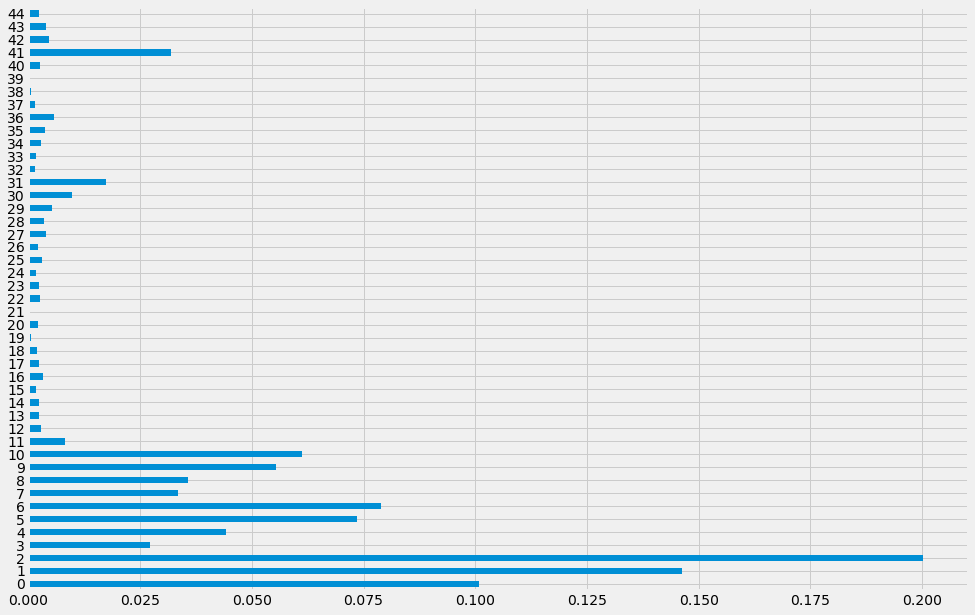

0     0.100876
1     0.146194
2     0.200285
3     0.027232
4     0.044240
5     0.073542
6     0.078854
7     0.033514
8     0.035733
9     0.055449
10    0.061294
11    0.008283
12    0.002803
13    0.002303
14    0.002346
15    0.001739
16    0.003325
17    0.002354
18    0.002014
19    0.000585
20    0.002106
21    0.000390
22    0.002602
23    0.002459
24    0.001595
25    0.002941
26    0.002058
27    0.004039
28    0.003478
29    0.005160
30    0.009847
31    0.017396
32    0.001535
33    0.001707
34    0.002893
35    0.003672
36    0.005676
37    0.001537
38    0.000586
39    0.000125
40    0.002579
41    0.031918
42    0.004527
43    0.003896
44    0.002316
dtype: float64


In [86]:
plt.figure(figsize=(15,10))
important_coeff1=pd.Series(rf.feature_importances_)
important_coeff1.plot(kind="barh")
plt.show()
print(important_coeff1)

In [84]:
#Random Forest accuracy

def MAPE(y_test,pred):
    mape = np.mean(np.abs((y_test - pred)/y_test))*100
    return mape

rf_MAPE = MAPE(y_test,pred)
print("MAPE value: ",rf_MAPE)
Accuracyrf = 100 - rf_MAPE
print('Accuracy of RF Regression: {:0.2f}%.'.format(Accuracyrf))
print('MAE: %f' % mean_absolute_error(y_test, pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))
print('R2 %f' % r2_score(y_test, pred))

MAPE value:  42.93868357234231
Accuracy of RF Regression: 57.06%.
MAE: 57.319168
RMSE: 95.682570
R2 0.535965


In [85]:
#Random Forest accuracy

def MAPE(y_train,predictions):
    mape = np.mean(np.abs((y_train - predictions)/y_train))*100
    return mape

rf_MAPE = MAPE(y_train,predictions)
print("MAPE value: ",rf_MAPE)
Accuracyrf = 100 - rf_MAPE
print('Accuracy of RF Regression: {:0.2f}%.'.format(Accuracyrf))
print('MAE: %f' % mean_absolute_error(y_train, predictions))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 %f' % r2_score(y_train, predictions))

MAPE value:  16.659655270140796
Accuracy of RF Regression: 83.34%.
MAE: 22.677869
RMSE: 39.628640
R2 0.923830
